# 1. Import required libraries

Install optional packages if missing (yfinance used for convenience)

In [ ]:
import subprocess
import sys

# Install required packages from pyproject.toml dependencies
required = ["pandas", "numpy", "matplotlib", "yfinance"]
for pkg in required:
    try:
        __import__(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])

import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

%matplotlib inline

/var/folders/2r/ltfgzg2946v38nwkzbkp5x6m0000gn/T/ipykernel_85673/2590401125.py:10: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if pkgutil.find_loader(pkg) is None:


Installing scikit-learn...



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: pip3 install --upgrade pip
Matplotlib is building the font cache; this may take a moment.


Environment ready.


# Stage 1: Stock Analytics

In [ ]:
import sys
from pathlib import Path

# Add model package to path (works for shared/cloned repos)
model_path = Path(__file__).parent.parent
sys.path.insert(0, str(model_path))

from model.orchestration.stock_analytics_orchestrator import StockAnalyticsOrchestrator

In [6]:
# Instantiate orchestrator for SNOW
TICKER = "SNOW"
orchestrator = StockAnalyticsOrchestrator(TICKER)

## get_technical_metrics
Retrieve technical metrics from the `StockAnalyticsOrchestrator` and print selected values.


In [ ]:
tech = orchestrator.get_technical_metrics()
hist = orchestrator.stock_data_provider.history()

print(f"Technical Metrics for {TICKER}")
print(f"Current Price: ${tech.get('current_price'):.2f}")
print(f"52-Week High: ${tech.get('price_252d_high'):.2f}")
print(f"52-Week Low: ${tech.get('price_252d_low'):.2f}")
print(f"Historical Volatility: {tech.get('historical_volatility_annual'):.2%}")
print(f"Bollinger Position: {tech.get('bollinger_position_20d_2std'):.2f}")
print(f"\nData points available: {len(hist)}")

Available technical metric keys (sample): ['avg_volume_30d', 'avg_volume_total', 'bollinger_lower_20d_2std', 'bollinger_position_20d_2std', 'bollinger_upper_20d_2std', 'bollinger_width_20d_2std', 'calmar_ratio', 'current_drawdown', 'current_price', 'daily_return_mean', 'daily_return_std', 'ema_20_current', 'ema_50_current', 'historical_volatility_annual', 'historical_volatility_daily', 'latest_volume', 'log_return_mean', 'macd_current', 'macd_histogram_current', 'macd_signal_current', 'max_consecutive_losses', 'max_consecutive_wins', 'max_drawdown', 'momentum_10d', 'momentum_20d', 'momentum_5d', 'pct_from_252d_high', 'pct_from_252d_low', 'price_20d_high', 'price_20d_low']
Current price: 192.6999969482422
Historical SMA 20 (if available): 213.57750091552734

Tech summary: {'current_price': 192.6999969482422, 'sma_20': 213.57750091552734, 'historical_length': 251}


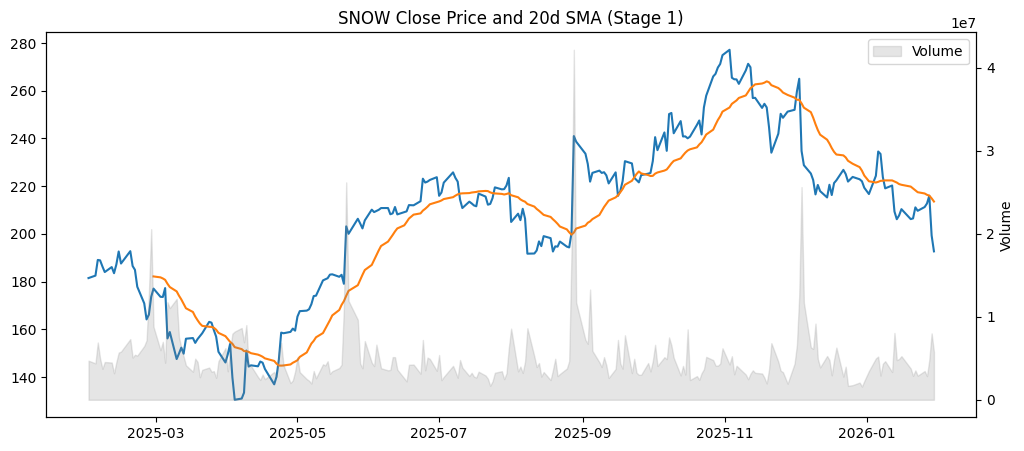

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Price and SMA
ax1.plot(hist.index, hist['Close'], label='Close Price', linewidth=2, color='#1f77b4')
ax1.plot(hist.index, hist['Close'].rolling(20).mean(), label='20-Day SMA', linewidth=2, color='#ff7f0e', alpha=0.8)
ax1.set_ylabel('Price ($)', fontsize=11)
ax1.tick_params(axis='y')
ax1.grid(True, alpha=0.3)

# Volume on secondary axis
ax2 = ax1.twinx()
ax2.fill_between(hist.index, hist['Volume'], alpha=0.2, color='gray', label='Volume')
ax2.set_ylabel('Volume', fontsize=11)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Format x-axis as dates
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
fig.autofmt_xdate(rotation=45)

ax1.set_title(f'{TICKER} - Price, SMA 20, and Volume', fontsize=13, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

## get_financial_metrics
Retrieve financial metrics and show primary accounting values.


In [ ]:
fin = orchestrator.get_financial_metrics()
income_df = orchestrator.stock_data_provider.get_income_stmt()
balance_df = orchestrator.stock_data_provider.get_balance_sheet()
cash_df = orchestrator.stock_data_provider.get_cashflow_stmt()

print(f"Financial Metrics for {TICKER}")
print(f"TTM Revenue: ${fin.get('ttm_revenue')/1e9:.2f}B")
print(f"Revenue Growth YoY: {fin.get('revenue_growth_yoy'):.2%}")
print(f"Gross Margin: {fin.get('gross_margin_q'):.2%}")
print(f"Operating Margin: {fin.get('operating_margin_q'):.2%}")
print(f"Net Profit Margin: {fin.get('net_profit_margin_q'):.2%}")
print(f"ROE: {fin.get('return_on_equity_q'):.2%}")
print(f"Debt/Equity: {fin.get('debt_to_equity_q'):.2f}x")

Financial metric keys (sample): ['accruals_ratio', 'asset_turnover_q', 'capex_to_revenue_q', 'cash_ratio_q', 'current_ratio_q', 'days_sales_outstanding', 'debt_to_assets_q', 'debt_to_equity_q', 'earnings_growth_q', 'earnings_growth_yoy', 'ebitda_margin_q', 'equity_multiplier_q', 'fcf_margin_q', 'fcf_to_ni_ratio', 'free_cash_flow_q', 'gross_margin_q', 'interest_coverage_ratio', 'net_profit_margin_q', 'ocf_to_net_income_q', 'operating_leverage', 'operating_margin_q', 'quick_ratio_q', 'return_on_assets_q', 'return_on_equity_q', 'revenue_growth_q', 'revenue_growth_yoy', 'roic_q', 'ttm_ebitda', 'ttm_ebitda_margin', 'ttm_free_cashflow']
TTM revenue: 4386722000.0
Revenue growth YoY: 0.059337851068456876

Income statement rows: ['TaxEffectOfUnusualItems', 'TaxRateForCalcs', 'NormalizedEBITDA', 'TotalUnusualItems', 'TotalUnusualItemsExcludingGoodwill', 'NetIncomeFromContinuingOperationNetMinorityInterest', 'ReconciledDepreciation', 'ReconciledCostOfRevenue', 'EBITDA', 'EBIT']


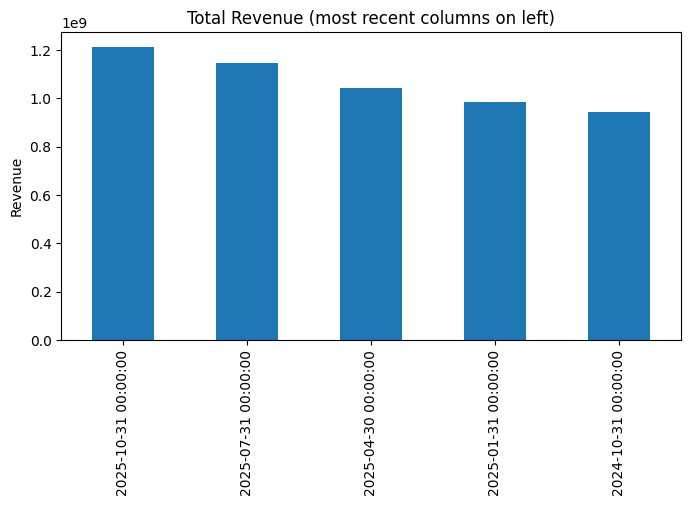

In [ ]:
if 'TotalRevenue' in income_df.index:
    rev_series = pd.to_numeric(income_df.loc['TotalRevenue'])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    rev_series.plot(kind='bar', ax=ax, color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Format y-axis as billions
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
    ax.set_ylabel('Revenue ($)', fontsize=11)
    ax.set_xlabel('Quarter', fontsize=11)
    ax.set_title(f'{TICKER} - Quarterly Total Revenue', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Format x-axis labels as dates
    if isinstance(rev_series.index[0], pd.Timestamp):
        ax.set_xticklabels([d.strftime('%Y-%m') for d in rev_series.index], rotation=45)
    
    plt.tight_layout()
    plt.show()

## get_thesis_context
Generate a concise thesis context summary and show numeric context fields as a small chart.


## Advanced Technical Metrics

In [21]:
adv_tech = orchestrator.get_advanced_technical_metrics()

print(f"Advanced Technical Metrics for {TICKER}")
if adv_tech.get('max_drawdown'):
    print(f"Max Drawdown: {adv_tech.get('max_drawdown'):.2%}")
if adv_tech.get('calmar_ratio'):
    print(f"Calmar Ratio: {adv_tech.get('calmar_ratio'):.2f}")
if adv_tech.get('daily_return_mean'):
    print(f"Daily Return Mean: {adv_tech.get('daily_return_mean'):.4f}")
if adv_tech.get('daily_return_std'):
    print(f"Daily Return Std Dev: {adv_tech.get('daily_return_std'):.4f}")
if adv_tech.get('macd_current'):
    print(f"MACD Current: {adv_tech.get('macd_current'):.4f}")
if adv_tech.get('momentum_10d'):
    print(f"Momentum (10d): {adv_tech.get('momentum_10d'):.4f}")

Advanced Technical Metrics for SNOW


## Volume Positioning Metrics

In [23]:
volume = orchestrator.get_volume_positioning_metrics()

print(f"Volume Positioning for {TICKER}")
if volume.get('average_daily_volume'):
    print(f"Average Daily Volume (30d): {volume.get('average_daily_volume'):,.0f}")
if volume.get('latest_volume'):
    print(f"Latest Volume: {volume.get('latest_volume'):,.0f}")
if volume.get('volume_trend_ratio_20d'):
    print(f"Volume Trend Ratio (20d): {volume.get('volume_trend_ratio_20d'):.2f}")
if volume.get('abnormal_volume_20d') is not None:
    print(f"Abnormal Volume (20d): {volume.get('abnormal_volume_20d'):.2%}")
if volume.get('volume_volatility_20d'):
    print(f"Volume Volatility (20d): {volume.get('volume_volatility_20d'):.4f}")

Volume Positioning for SNOW
Average Daily Volume (30d): 5,108,163
Volume Trend Ratio (20d): 1.28
Abnormal Volume (20d): 27.90%
Volume Volatility (20d): 0.4645


## Peer Metrics

In [24]:
peer_metrics = orchestrator.get_peer_metrics()
peer_prices = orchestrator.peer_discovery_provider.get_peers_stock_data()

print(f"Peer Relative Performance (63d window)")
print(f"Excess Return vs Peers: {peer_metrics.get('rolling_excess_return_63d_vs_peers'):.2%}")
print(f"Outperformance Frequency: {peer_metrics.get('outperformance_frequency_63d'):.2%}")
print(f"Relative Recovery Time: {peer_metrics.get('relative_recovery_time_days'):.0f} days")
print(f"\nTop Peers: {list(peer_prices.keys())[:5]}")

Peer Relative Performance (63d window)
Excess Return vs Peers: -0.41%
Outperformance Frequency: 52.38%
Relative Recovery Time: -90 days

Top Peers: ['IFNNF', 'TEL', 'IFNNY', 'MSI', 'MRVL']


## Stock Information & Company Data

In [25]:
info = orchestrator.stock_data_provider.get_info()

# Display key company info
key_fields = ['longName', 'sector', 'industry', 'website', 'fullTimeEmployees', 
              'marketCap', 'enterpriseValue', 'trailingPE', 'forwardPE', 'beta']

print(f"Company Information for {TICKER}")
for field in key_fields:
    value = info.get(field)
    if value:
        if isinstance(value, (int, float)) and value > 1e6:
            print(f"{field}: ${value/1e9:.2f}B" if value > 1e9 else f"{field}: ${value/1e6:.2f}M")
        else:
            print(f"{field}: {value}")

Company Information for SNOW
longName: Snowflake Inc.
sector: Technology
industry: Software - Application
website: https://www.snowflake.com
fullTimeEmployees: 9023
marketCap: $65.94B
enterpriseValue: $65.27B
forwardPE: 118.03837
beta: 1.147


## Macro Sensitivity

In [26]:
macro = orchestrator.get_macro_metrics()

# Show top macro sensitivities
macro_betas = {k: v for k, v in macro.items() if 'rolling_beta' in k}
if macro_betas:
    sorted_betas = sorted(macro_betas.items(), key=lambda x: abs(x[1]), reverse=True)
    print(f"Top Macro Economic Sensitivities (63d rolling beta) for {TICKER}:")
    for factor, beta in sorted_betas[:5]:
        factor_name = factor.replace('macro_rolling_beta_63d_vs_', '')
        print(f"  {factor_name}: {beta:.3f}")

Top Macro Economic Sensitivities (63d rolling beta) for SNOW:
  PAYEMS: 12.189
  INDPRO: 1.017
  CPIAUCSL: 0.983
  GS2: -0.405
  GS10: 0.101


In [ ]:
thesis_ctx = orchestrator.get_thesis_context()

print(f"Thesis Quantitative Context for {TICKER}")
print(f"Revenue Growth YoY: {thesis_ctx.revenue_growth_yoy:.2%}" if thesis_ctx.revenue_growth_yoy else "Revenue Growth YoY: N/A")
print(f"Earnings Growth YoY: {thesis_ctx.earnings_growth_yoy:.2%}" if thesis_ctx.earnings_growth_yoy else "Earnings Growth YoY: N/A")
print(f"Forward P/E: {thesis_ctx.forward_pe:.1f}x" if thesis_ctx.forward_pe else "Forward P/E: N/A")
print(f"Analyst Target Price Upside: {thesis_ctx.analyst_target_price_upside:.2%}" if thesis_ctx.analyst_target_price_upside else "Analyst Target Price Upside: N/A")

print("\n" + "="*60)
print("QUANTITATIVE CONTEXT SUMMARY")
print("="*60)
print(thesis_ctx.to_prompt_context())

Thesis quantitative context (key fields):
 revenue_growth_yoy: 0.28746069925081785
 earnings_growth_yoy: 0.09350590078296775
 ttm_revenue: None
 pe_current: None
 forward_pe: 118.03837
 analyst_target_price_upside: 0.4618170212765958

Prompt summary:

QUANTITATIVE CONTEXT FOR SNOW (as of 2026-02-02)
NOTE: These metrics provide supplementary context only. 
Your independent research and analysis should take precedence.

GROWTH TRAJECTORY:
  • Revenue Growth (YoY): +28.7%
  • Earnings Growth (YoY): +9.4%
  • FCF Growth (YoY): +45.2%

MARGIN TRENDS:
  • Gross Margin: 67.8% (+1.8pp vs year ago)
  • Operating Margin: -27.2% (+11.6pp vs year ago)

VALUATION CONTEXT:
  • Forward P/E: 118.0x
  • Price vs 52w High: 68.7%

CAPITAL EFFICIENCY:
  • ROE: -63.3% (-2.7pp vs year ago)
  • Debt/Equity: 1.26x (+0.37 vs year ago)

ANALYST SENTIMENT:
  • Analyst Rating: Buy (1.57)
  • Target Price Upside: +46.2%
  • Recent Revisions: Down



## Summary

This notebook demonstrates Stage 1 of the AI Research System, showcasing comprehensive stock analytics across multiple dimensions:
- **Technical Analysis**: Price movements, volatility, trend indicators
- **Financial Analysis**: Income statement, margins, growth rates, efficiency ratios
- **Volume & Positioning**: Daily volume patterns and abnormal trading activity
- **Peer Analysis**: Relative performance vs. comparable companies
- **Macro Sensitivity**: Economic factor exposure and sensitivities
- **Company Data**: Market information, sector/industry classification
- **Quantitative Context**: Summary metrics for thesis development

All data flows through the `StockAnalyticsOrchestrator`, which delegates calculations to specialized calculators and providers. For Stage 2 (Thesis Validation with LLM agents), configure API credentials in your environment.